# Initial Random Forest

Train Accuracy: 0.9492119089316988
Test Accuracy: 0.45454545454545453

Confusion Matrix for Train Set:
[[ 93   6   4]
 [  6 286   6]
 [  4   3 163]]

Confusion Matrix for Test Set:
[[ 2 19  7]
 [ 3 52 19]
 [ 1 29 11]]

Classification Report for Test Set:
                       precision    recall  f1-score   support

      1 (0-1 doctors)       0.33      0.07      0.12        28
      2 (2-3 doctors)       0.52      0.70      0.60        74
3 (4 or more doctors)       0.30      0.27      0.28        41

             accuracy                           0.45       143
            macro avg       0.38      0.35      0.33       143
         weighted avg       0.42      0.45      0.41       143


For Test Set: TP=2, FP=19, TN=52, FN=3


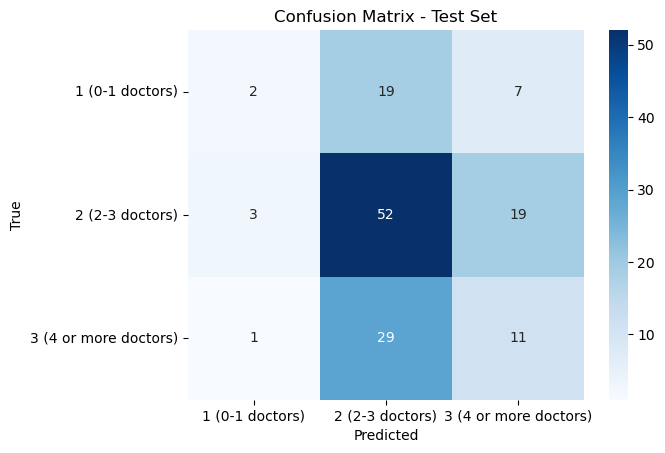

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('NPHA-doctor-visits.csv')


X = dataset.drop(columns=["Number of Doctors Visited"])  # Features: all columns except the target
y = dataset['Number of Doctors Visited']  # Target: Number of Doctors Visited (already categorical: 1, 2, 3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions for train and test sets
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)

# Calculate Accuracy for train and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Confusion Matrix for train and test sets
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Classification Report for test set
class_report_test = classification_report(y_test, y_pred_test, target_names=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])

# Print results
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"\nConfusion Matrix for Train Set:\n{cm_train}")
print(f"\nConfusion Matrix for Test Set:\n{cm_test}")
print(f"\nClassification Report for Test Set:\n{class_report_test}")

# TP, FP, TN, FN for the test set
TP = cm_test[0, 0]  # True Positive
FP = cm_test[0, 1]  # False Positive
TN = cm_test[1, 1]  # True Negative
FN = cm_test[1, 0]  # False Negative

print(f"\nFor Test Set: TP={TP}, FP={FP}, TN={TN}, FN={FN}")

# Optional: Visualize the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'], yticklabels=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')
plt.show()


# Trying to improve with SMOTE and GRIDSearch

C:\Users\Niloy\AppData\Local\Temp\ipykernel_1032\904702827.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.fillna(dataset.mode().iloc[0], inplace=True)


Train Accuracy: 0.9360986547085202
Test Accuracy: 0.6160714285714286

Confusion Matrix for Train Set:
[[290   8   3]
 [ 20 272   5]
 [ 18   3 273]]

Confusion Matrix for Test Set:
[[50 14  7]
 [12 38 25]
 [12 16 50]]

Classification Report for Test Set:
                       precision    recall  f1-score   support

      1 (0-1 doctors)       0.68      0.70      0.69        71
      2 (2-3 doctors)       0.56      0.51      0.53        75
3 (4 or more doctors)       0.61      0.64      0.62        78

             accuracy                           0.62       224
            macro avg       0.61      0.62      0.62       224
         weighted avg       0.61      0.62      0.61       224



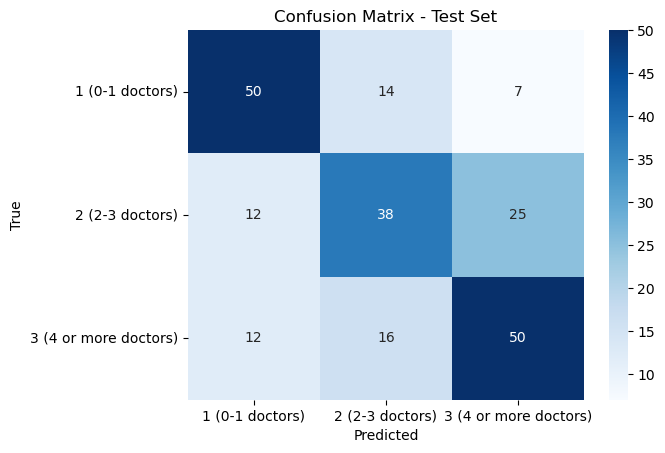

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
dataset = pd.read_csv('NPHA-doctor-visits.csv')

dataset.replace(-1, pd.NA, inplace=True)
dataset.fillna(dataset.mode().iloc[0], inplace=True)
dataset = dataset.infer_objects(copy=False)

# Drop age class (if it's unnecessary for your model)
X = dataset.drop(columns=["Number of Doctors Visited", "Age"])  # Drop age class
y = dataset['Number of Doctors Visited']  # Target: Number of Doctors Visited (already categorical: 1, 2, 3)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=50,  # Use fewer trees
    max_depth=10,     # Limit tree depth
    min_samples_split=10,  # Increase required samples to split
    min_samples_leaf=4,    # Increase required samples per leaf
    random_state=42
)

# Hyperparameter tuning with GridSearchCV (optional)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_rf_classifier = grid_search.best_estimator_

# Train the model
best_rf_classifier.fit(X_train, y_train)

# Make predictions for train and test sets
y_pred_train = best_rf_classifier.predict(X_train)
y_pred_test = best_rf_classifier.predict(X_test)

# Calculate Accuracy for train and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Confusion Matrix for train and test sets
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Classification Report for test set
class_report_test = classification_report(y_test, y_pred_test, target_names=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])

# Print results
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"\nConfusion Matrix for Train Set:\n{cm_train}")
print(f"\nConfusion Matrix for Test Set:\n{cm_test}")
print(f"\nClassification Report for Test Set:\n{class_report_test}")

# Optional: Visualize the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'], yticklabels=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')
plt.show()


# Including LabelEncoder this time

C:\Users\Niloy\AppData\Local\Temp\ipykernel_1032\65357470.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace({-1: None, -2: None}, inplace=True)  # Replace -1 and -2 with NaN (missing values)
C:\Users\Niloy\AppData\Local\Temp\ipykernel_1032\65357470.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.apply(lambda col: col.fillna(col.mode()[0]))


Train Accuracy: 0.6725043782837128
Test Accuracy: 0.46153846153846156

Confusion Matrix for Train Set:
[[ 38  56   9]
 [  9 262  27]
 [  6  80  84]]

Confusion Matrix for Test Set:
[[ 2 21  5]
 [ 4 49 21]
 [ 3 23 15]]

Classification Report for Test Set:
                       precision    recall  f1-score   support

      1 (0-1 doctors)       0.22      0.07      0.11        28
      2 (2-3 doctors)       0.53      0.66      0.59        74
3 (4 or more doctors)       0.37      0.37      0.37        41

             accuracy                           0.46       143
            macro avg       0.37      0.37      0.35       143
         weighted avg       0.42      0.46      0.43       143



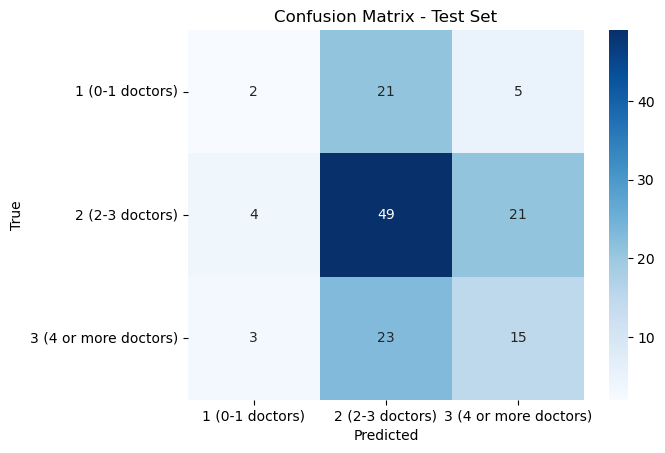

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
dataset = pd.read_csv('NPHA-doctor-visits.csv')

# Select relevant features (Dental Health, Mental Health, Physical Health, Employment, Race)
X = dataset[['Dental Health', 'Mental Health', 'Physical Health', 'Race', 'Employment']]

# Target variable: Number of Doctors Visited
y = dataset['Number of Doctors Visited']

# Handle missing or unwanted values (-1 for "Refused" or -2 for "Not asked")
X.replace({-1: None, -2: None}, inplace=True)  # Replace -1 and -2 with NaN (missing values)

# Optionally, you can fill missing values with the most frequent value in each column
X = X.apply(lambda col: col.fillna(col.mode()[0]))

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in ['Dental Health', 'Mental Health', 'Physical Health', 'Race', 'Employment']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # Store the encoder to use it later if needed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions for train and test sets
y_pred_train = rf_classifier.predict(X_train)
y_pred_test = rf_classifier.predict(X_test)

# Calculate Accuracy for train and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Confusion Matrix for train and test sets
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Classification Report for test set
class_report_test = classification_report(y_test, y_pred_test, target_names=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])

# Print results
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"\nConfusion Matrix for Train Set:\n{cm_train}")
print(f"\nConfusion Matrix for Test Set:\n{cm_test}")
print(f"\nClassification Report for Test Set:\n{class_report_test}")

# Optional: Visualize the confusion matrix for the test set
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'], yticklabels=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')
plt.show()


C:\Users\Niloy\AppData\Local\Temp\ipykernel_1032\1764776158.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace({-1: None, -2: None}, inplace=True)  # Replace -1 and -2 with NaN (missing values)
C:\Users\Niloy\AppData\Local\Temp\ipykernel_1032\1764776158.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.apply(lambda col: col.fillna(col.mode()[0]))


Best Parameters from GridSearchCV: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Train Accuracy: 0.5795964125560538
Test Accuracy: 0.5267857142857143

Confusion Matrix for Train Set:
[[208  55  38]
 [ 76 145  76]
 [ 72  58 164]]

Confusion Matrix for Test Set:
[[48 15  8]
 [25 31 19]
 [22 17 39]]

Classification Report for Test Set:
                       precision    recall  f1-score   support

      1 (0-1 doctors)       0.51      0.68      0.58        71
      2 (2-3 doctors)       0.49      0.41      0.45        75
3 (4 or more doctors)       0.59      0.50      0.54        78

             accuracy                           0.53       224
            macro avg       0.53      0.53      0.52       224
         weighted avg       0.53      0.53      0.52       224



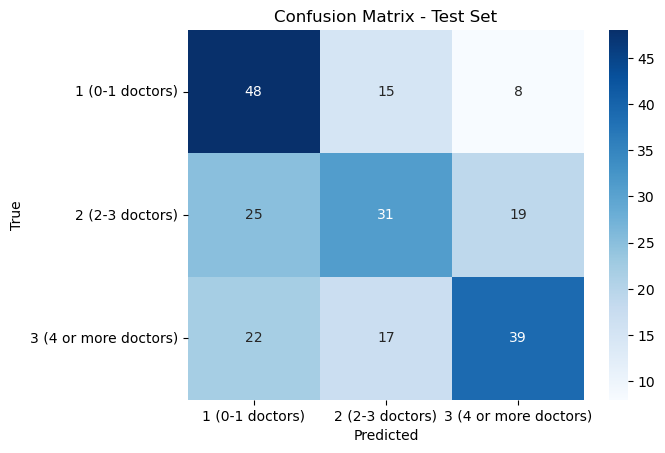

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('NPHA-doctor-visits.csv')

# Select relevant features (Dental Health, Mental Health, Physical Health, Race, Employment)
X = dataset[['Dental Health', 'Mental Health', 'Physical Health', 'Race', 'Employment']]

# Target variable: Number of Doctors Visited
y = dataset['Number of Doctors Visited']

# Handle missing or unwanted values (-1 for "Refused" or -2 for "Not asked")
X.replace({-1: None, -2: None}, inplace=True)  # Replace -1 and -2 with NaN (missing values)

# Optionally, fill missing values with the most frequent value in each column
X = X.apply(lambda col: col.fillna(col.mode()[0]))

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in ['Dental Health', 'Mental Health', 'Physical Health', 'Race', 'Employment']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # Store the encoder to use it later if needed

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV with 5-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_rf_classifier = grid_search.best_estimator_

# Train the model with the best parameters
best_rf_classifier.fit(X_train, y_train)

# Make predictions for train and test sets
y_pred_train = best_rf_classifier.predict(X_train)
y_pred_test = best_rf_classifier.predict(X_test)

# Calculate Accuracy for train and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Confusion Matrix for train and test sets
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Classification Report for test set
class_report_test = classification_report(y_test, y_pred_test, target_names=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])

# Print results
print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"\nConfusion Matrix for Train Set:\n{cm_train}")
print(f"\nConfusion Matrix for Test Set:\n{cm_test}")
print(f"\nClassification Report for Test Set:\n{class_report_test}")

# Optional: Visualize the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'], yticklabels=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')
plt.show()


C:\Users\Niloy\AppData\Local\Temp\ipykernel_1032\1764776158.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace({-1: None, -2: None}, inplace=True)  # Replace -1 and -2 with NaN (missing values)
C:\Users\Niloy\AppData\Local\Temp\ipykernel_1032\1764776158.py:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.apply(lambda col: col.fillna(col.mode()[0]))


Best Parameters from GridSearchCV: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Train Accuracy: 0.5795964125560538
Test Accuracy: 0.5267857142857143

Confusion Matrix for Train Set:
[[208  55  38]
 [ 76 145  76]
 [ 72  58 164]]

Confusion Matrix for Test Set:
[[48 15  8]
 [25 31 19]
 [22 17 39]]

Classification Report for Test Set:
                       precision    recall  f1-score   support

      1 (0-1 doctors)       0.51      0.68      0.58        71
      2 (2-3 doctors)       0.49      0.41      0.45        75
3 (4 or more doctors)       0.59      0.50      0.54        78

             accuracy                           0.53       224
            macro avg       0.53      0.53      0.52       224
         weighted avg       0.53      0.53      0.52       224



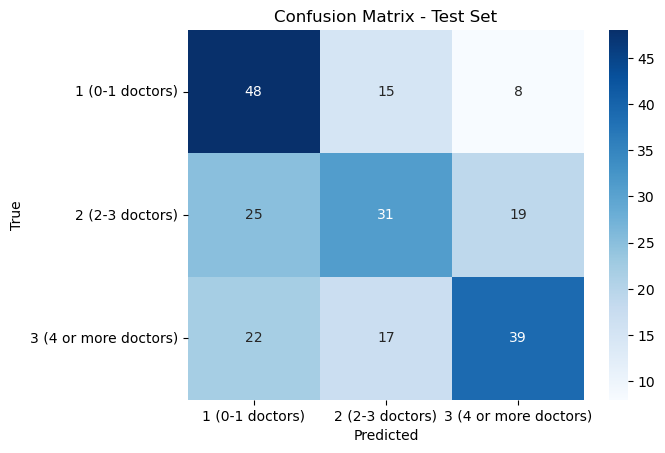

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('NPHA-doctor-visits.csv')

# Select relevant features (Dental Health, Mental Health, Physical Health, Race, Employment)
X = dataset[['Dental Health', 'Mental Health', 'Physical Health', 'Race', 'Employment']]

# Target variable: Number of Doctors Visited
y = dataset['Number of Doctors Visited']

# Handle missing or unwanted values (-1 for "Refused" or -2 for "Not asked")
X.replace({-1: None, -2: None}, inplace=True)  # Replace -1 and -2 with NaN (missing values)

# Optionally, fill missing values with the most frequent value in each column
X = X.apply(lambda col: col.fillna(col.mode()[0]))

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in ['Dental Health', 'Mental Health', 'Physical Health', 'Race', 'Employment']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # Store the encoder to use it later if needed

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV with 5-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_rf_classifier = grid_search.best_estimator_

# Train the model with the best parameters
best_rf_classifier.fit(X_train, y_train)

# Make predictions for train and test sets
y_pred_train = best_rf_classifier.predict(X_train)
y_pred_test = best_rf_classifier.predict(X_test)

# Calculate Accuracy for train and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Confusion Matrix for train and test sets
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Classification Report for test set
class_report_test = classification_report(y_test, y_pred_test, target_names=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])

# Print results
print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"\nConfusion Matrix for Train Set:\n{cm_train}")
print(f"\nConfusion Matrix for Test Set:\n{cm_test}")
print(f"\nClassification Report for Test Set:\n{class_report_test}")

# Optional: Visualize the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'], yticklabels=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')
plt.show()


# including Kfold  for classification

C:\Users\Niloy\AppData\Local\Temp\ipykernel_1032\3726759979.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace({-1: None, -2: None}, inplace=True)  # Replace -1 and -2 with NaN (missing values)
C:\Users\Niloy\AppData\Local\Temp\ipykernel_1032\3726759979.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.apply(lambda col: col.fillna(col.mode()[0]))


Best Parameters from GridSearchCV: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Train Accuracy: 0.6177130044843049
Test Accuracy: 0.5625

Confusion Matrix for Train Set:
[[213  56  32]
 [ 69 172  56]
 [ 65  63 166]]

Confusion Matrix for Test Set:
[[48 15  8]
 [23 37 15]
 [22 15 41]]

Classification Report for Test Set:
                       precision    recall  f1-score   support

      1 (0-1 doctors)       0.52      0.68      0.59        71
      2 (2-3 doctors)       0.55      0.49      0.52        75
3 (4 or more doctors)       0.64      0.53      0.58        78

             accuracy                           0.56       224
            macro avg       0.57      0.57      0.56       224
         weighted avg       0.57      0.56      0.56       224

Classification Report for Train Set:
                       precision    recall  f1-score   support

      1 (0-1 doctors)       0.61      0.71      0.66       301
      2 (2-3 doctors)     

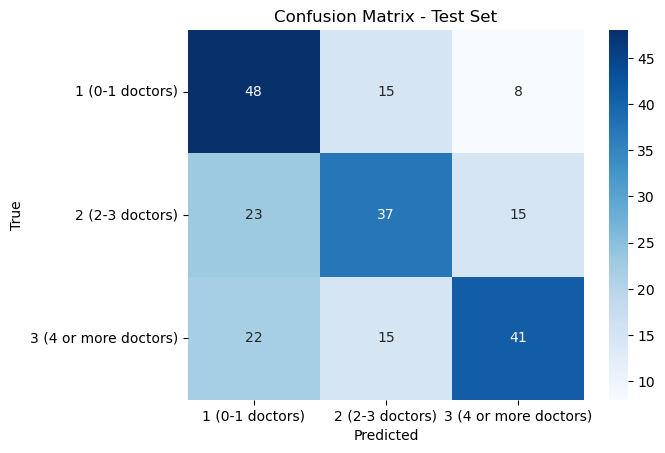

In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
dataset = pd.read_csv('NPHA-doctor-visits.csv')

# Select relevant features (Dental Health, Mental Health, Physical Health, Race, Employment)
X = dataset[['Dental Health', 'Mental Health', 'Physical Health', 'Race', 'Employment']]

# Target variable: Number of Doctors Visited
y = dataset['Number of Doctors Visited']

# Handle missing or unwanted values (-1 for "Refused" or -2 for "Not asked")
X.replace({-1: None, -2: None}, inplace=True)  # Replace -1 and -2 with NaN (missing values)

# Optionally, fill missing values with the most frequent value in each column
X = X.apply(lambda col: col.fillna(col.mode()[0]))

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in ['Dental Health', 'Mental Health', 'Physical Health', 'Race', 'Employment']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # Store the encoder to use it later if needed

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use StratifiedKFold for cross-validation with GridSearchCV
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_rf_classifier = grid_search.best_estimator_

# Train the model with the best parameters
best_rf_classifier.fit(X_train, y_train)

# Make predictions for train and test sets
y_pred_train = best_rf_classifier.predict(X_train)
y_pred_test = best_rf_classifier.predict(X_test)

# Calculate Accuracy for train and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Confusion Matrix for train and test sets
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Classification Report for test set
class_report_test = classification_report(y_test, y_pred_test, target_names=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])
classification_report_train = classification_report(y_train, y_pred_train, target_names=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])
# Print results
print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"\nConfusion Matrix for Train Set:\n{cm_train}")
print(f"\nConfusion Matrix for Test Set:\n{cm_test}")
print(f"\nClassification Report for Test Set:\n{class_report_test}")

print(f"Classification Report for Train Set:\n{classification_report_train}")

# Optional: Visualize the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'], yticklabels=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')
plt.show()


C:\Users\Niloy\AppData\Local\Temp\ipykernel_1032\3615762227.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace({-1: None, -2: None}, inplace=True)  # Replace -1 and -2 with NaN (missing values)
C:\Users\Niloy\AppData\Local\Temp\ipykernel_1032\3615762227.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.apply(lambda col: col.fillna(col.mode()[0]))


Best Parameters from GridSearchCV: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Train Accuracy: 0.6177130044843049
Test Accuracy: 0.5625

Confusion Matrix for Train Set:
[[213  56  32]
 [ 69 172  56]
 [ 65  63 166]]

Confusion Matrix for Test Set:
[[48 15  8]
 [23 37 15]
 [22 15 41]]

Classification Report for Test Set:
                       precision    recall  f1-score   support

      1 (0-1 doctors)       0.52      0.68      0.59        71
      2 (2-3 doctors)       0.55      0.49      0.52        75
3 (4 or more doctors)       0.64      0.53      0.58        78

             accuracy                           0.56       224
            macro avg       0.57      0.57      0.56       224
         weighted avg       0.57      0.56      0.56       224


Classification Report for Train Set:
                       precision    recall  f1-score   support

      1 (0-1 doctors)       0.61      0.71      0.66       301
      2 (2-3 doctors)    

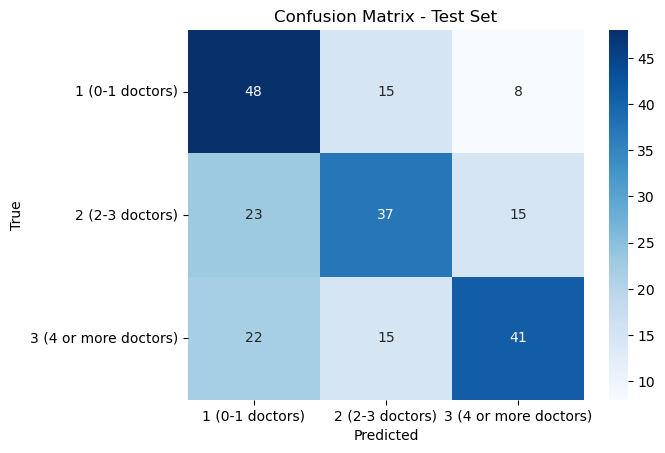

In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
dataset = pd.read_csv('NPHA-doctor-visits.csv')

# Select relevant features (Dental Health, Mental Health, Physical Health, Race, Employment)
X = dataset[['Dental Health', 'Mental Health', 'Physical Health', 'Race', 'Employment']]

# Target variable: Number of Doctors Visited
y = dataset['Number of Doctors Visited']

# Handle missing or unwanted values (-1 for "Refused" or -2 for "Not asked")
X.replace({-1: None, -2: None}, inplace=True)  # Replace -1 and -2 with NaN (missing values)

# Optionally, fill missing values with the most frequent value in each column
X = X.apply(lambda col: col.fillna(col.mode()[0]))

# Convert categorical variables to numerical using LabelEncoder
label_encoders = {}
for column in ['Dental Health', 'Mental Health', 'Physical Health', 'Race', 'Employment']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # Store the encoder to use it later if needed

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use StratifiedKFold for cross-validation with GridSearchCV
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_rf_classifier = grid_search.best_estimator_

# Train the model with the best parameters
best_rf_classifier.fit(X_train, y_train)

# Make predictions for train and test sets
y_pred_train = best_rf_classifier.predict(X_train)
y_pred_test = best_rf_classifier.predict(X_test)

# Calculate Accuracy for train and test sets
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Confusion Matrix for train and test sets
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for each class
def calculate_tpr_fpr(cm):
    tpr_fpr = {}
    for i in range(cm.shape[0]):  # Loop through each class
        TP = cm[i][i]  # True positives are the diagonal elements
        FN = sum(cm[i]) - TP  # False negatives are the sum of the row minus the TP
        FP = sum(cm[:, i]) - TP  # False positives are the sum of the column minus the TP
        TN = sum(sum(cm)) - (TP + FN + FP)  # True negatives are the total minus TP, FN, FP
        
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate
        
        tpr_fpr[i] = {'TPR': TPR, 'FPR': FPR}
    return tpr_fpr

# Calculate TPR and FPR for the confusion matrices
tpr_fpr_train = calculate_tpr_fpr(cm_train)
tpr_fpr_test = calculate_tpr_fpr(cm_test)

# Classification Report for test and train sets
class_report_test = classification_report(y_test, y_pred_test, target_names=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])
class_report_train = classification_report(y_train, y_pred_train, target_names=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])

# Print results
print(f"Best Parameters from GridSearchCV: {grid_search.best_params_}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"\nConfusion Matrix for Train Set:\n{cm_train}")
print(f"\nConfusion Matrix for Test Set:\n{cm_test}")
print(f"\nClassification Report for Test Set:\n{class_report_test}")
print(f"\nClassification Report for Train Set:\n{class_report_train}")

# Print TPR and FPR for both sets
print("\nTrue Positive Rate (TPR) and False Positive Rate (FPR) for Train Set:")
for i, metrics in tpr_fpr_train.items():
    print(f"Class {i+1}: TPR = {metrics['TPR']:.2f}, FPR = {metrics['FPR']:.2f}")

print("\nTrue Positive Rate (TPR) and False Positive Rate (FPR) for Test Set:")
for i, metrics in tpr_fpr_test.items():
    print(f"Class {i+1}: TPR = {metrics['TPR']:.2f}, FPR = {metrics['FPR']:.2f}")

# Optional: Visualize the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'], yticklabels=['1 (0-1 doctors)', '2 (2-3 doctors)', '3 (4 or more doctors)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Set')
plt.show()
